## Data Mining and Predictive Analytics Undergraduate Final Project
**Predicting NBA winners for the 2019-2020 season**<br/>
By: Katherine Wilsdon

Use the NBA data available at [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2019_games.html). Results of the 2018-2019 season games have been compiled on the CEADS website ('https://gitlab.com/CEADS/DrKerby/python/raw/master/basketball.csv'). If you wish to additionally use the 2017-2018 season to train your model you will need to compile this data yourself. A lot of other data is available at Basketball Reference, including prior year [standings](https://www.basketball-reference.com/leagues/NBA_2018_standings.html) and other player and team data. 

**Question 1**<br/>
Import the 2018-2019 season games into a DataFrame. Incorporate at least two more datasets from the Basketball Reference website and add them to your DataFrame (ie the 2017-2018 season, prior year standings, other player or team data, etc). Insert as many code and text cells as you need.

In [1190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1191]:
NBA_Results_2017_2019 = pd.read_csv('2017-2019NBAScheduleResults.csv')
NBA_Results_2017_2019.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,NaN


In [1192]:
NBA_Results_2019_2020 = pd.read_csv('2019-2020NBAScheduleResults.csv')
NBA_Results_2019_2020.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,Box Score,OT,20787,NaN
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,Box Score,NaN,19068,NaN
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,Box Score,NaN,15424,NaN
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,Box Score,NaN,17923,NaN
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,Box Score,NaN,18846,NaN


In [1193]:
NBA_Results_2017_2019['Unnamed: 7'].value_counts()

OT     117
2OT     14
3OT      3
4OT      2
Name: Unnamed: 7, dtype: int64

In [1194]:
NBA_Results_2019_2020['Unnamed: 7'].value_counts()

OT    12
Name: Unnamed: 7, dtype: int64

In [1195]:
NBA_Results_2017_2019['Unnamed: 6'].value_counts()

Box Score    2624
Name: Unnamed: 6, dtype: int64

In [1196]:
NBA_Results_2019_2020['Unnamed: 6'].value_counts()

Box Score    250
Name: Unnamed: 6, dtype: int64

In [1197]:
NBA_Results_2017_2019.columns = ['Date', 'Start (ET)', 'Visitor Team','VisitorPts','Home Team','HomePts','Box Score','OT','Attendance','Notes']
NBA_Results_2017_2019.head()
NBA_Results_2017_2019.drop('Box Score',axis=1,inplace=True)
NBA_Results_2017_2019.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN


In [1198]:
NBA_Results_2019_2020.columns = ['Date', 'Start (ET)', 'Visitor Team','VisitorPts','Home Team','HomePts','Box Score','OT','Attendance','Notes']
NBA_Results_2019_2020.head()
NBA_Results_2019_2020.drop('Box Score',axis=1,inplace=True)
NBA_Results_2019_2020.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,20787,NaN
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,19068,NaN
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,15424,NaN
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,17923,NaN
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,18846,NaN


In [1199]:
NBA_Standings_2016_2017 = pd.read_csv('2016-2017NBAStandings.csv')
NBA_Standings_2016_2017.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Golden State Warriors,67-15,36-5,31-10,25-5,42-10,9-1,8-2,8-2,...,20-6,3-4,48-6,2-1,14-1,13-3,12-2,9-3,12-4,5-1
2,2,San Antonio Spurs,61-21,31-10,30-11,25-5,36-16,9-1,8-2,8-2,...,18-8,8-5,30-8,4-0,11-4,12-2,10-5,8-2,13-4,3-4
3,3,Houston Rockets,55-27,30-11,25-16,19-11,36-16,8-2,5-5,6-4,...,15-9,8-3,30-11,2-1,9-6,15-2,10-7,6-3,9-6,4-2
4,4,Boston Celtics,53-29,30-11,23-18,36-16,17-13,11-5,11-7,14-4,...,16-9,7-6,17-11,2-1,8-7,10-6,10-4,8-4,11-5,4-2


In [1200]:
NBA_Standings_2017_2018 = pd.read_csv('2017-2018NBAStandings.csv')
NBA_Standings_2017_2018.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Houston Rockets,65-17,34-7,31-10,24-6,41-11,6-4,9-1,9-1,...,21-4,5-3,38-8,5-3,12-1,9-5,10-4,12-0,14-1,3-3
2,2,Toronto Raptors,59-23,34-7,25-16,40-12,19-11,12-4,14-4,14-4,...,18-7,5-7,33-5,4-2,9-5,11-3,10-5,9-2,12-4,4-2
3,3,Golden State Warriors,58-24,29-12,29-12,24-6,34-18,9-1,6-4,9-1,...,14-10,5-1,38-13,5-3,11-3,13-2,11-3,8-3,7-7,3-3
4,4,Boston Celtics,55-27,27-14,28-13,33-19,22-8,12-4,10-8,11-7,...,15-8,11-8,25-9,5-2,14-2,11-6,7-5,7-4,9-4,2-4


In [1201]:
NBA_Standings_2018_2019 = pd.read_csv('2018-2019NBAStandings.csv')
NBA_Standings_2018_2019.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Milwaukee Bucks,60-22,33-8,27-14,40-12,20-10,13-5,14-2,13-5,...,17-8,5-6,45-5,7-0,8-6,10-4,12-3,10-1,10-6,3-2
2,2,Toronto Raptors,58-24,32-9,26-15,36-16,22-8,12-4,10-8,14-4,...,15-8,11-7,33-9,7-1,12-3,8-7,10-5,8-1,9-6,4-1
3,3,Golden State Warriors,57-25,30-11,27-14,22-8,35-17,6-4,8-2,8-2,...,16-9,7-7,34-10,8-1,7-7,10-5,11-2,7-4,9-5,5-1
4,4,Denver Nuggets,54-28,34-7,20-21,20-10,34-18,7-3,6-4,7-3,...,15-10,13-3,23-11,6-1,9-6,8-4,12-4,7-4,9-6,3-3


In [1202]:
NBA_Standings_2019_2020 = pd.read_csv('2019-2020NBAStandings.csv')
NBA_Standings_2019_2020.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Los Angeles Lakers,15-2,8-1,7-1,4-1,11-1,0-1,1-0,3-0,...,0-0,3-0,6-1,3-1,12-1,0-0,0-0,0-0,0-0,0-0
2,2,Milwaukee Bucks,14-3,6-1,8-2,8-2,6-1,1-1,5-0,2-1,...,0-0,1-1,7-1,2-2,12-1,0-0,0-0,0-0,0-0,0-0
3,3,Boston Celtics,12-4,6-0,6-4,7-1,5-3,3-1,2-0,2-0,...,0-0,2-2,6-1,3-1,9-3,0-0,0-0,0-0,0-0,0-0
4,4,Denver Nuggets,12-3,7-2,5-1,5-1,7-2,3-0,0-0,2-1,...,0-0,3-1,4-1,3-2,9-1,0-0,0-0,0-0,0-0,0-0


In [1203]:
NBA_Standings_2016_2017.iloc[[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr


In [1204]:
NBA_Standings_2017_2018.iloc[[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr


In [1205]:
NBA_Standings_2018_2019.iloc[[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr


In [1206]:
NBA_Standings_2019_2020.iloc[[0]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr


In [1207]:
NBA_Standings_2016_2017.columns = ['Rank','Team','Overall','Home_Place','Road_Place','E_Conference','W_Conference','A_Division','C_Division','SE_Division','NW_Division','P_Division','SW_Division','Pre_All-Star','Post_All-Star','Margin_3_Pts_Or_Less','Margin_10_Pts_Or_More','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
NBA_Standings_2016_2017.head()
NBA_Standings_2016_2017.drop(0,axis=0, inplace=True)
NBA_Standings_2016_2017.head()

,Rank,Team,Overall,Home_Place,Road_Place,E_Conference,W_Conference,A_Division,C_Division,SE_Division,...,Post_All-Star,Margin_3_Pts_Or_Less,Margin_10_Pts_Or_More,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Golden State Warriors,67-15,36-5,31-10,25-5,42-10,9-1,8-2,8-2,...,20-6,3-4,48-6,2-1,14-1,13-3,12-2,9-3,12-4,5-1
2,2,San Antonio Spurs,61-21,31-10,30-11,25-5,36-16,9-1,8-2,8-2,...,18-8,8-5,30-8,4-0,11-4,12-2,10-5,8-2,13-4,3-4
3,3,Houston Rockets,55-27,30-11,25-16,19-11,36-16,8-2,5-5,6-4,...,15-9,8-3,30-11,2-1,9-6,15-2,10-7,6-3,9-6,4-2
4,4,Boston Celtics,53-29,30-11,23-18,36-16,17-13,11-5,11-7,14-4,...,16-9,7-6,17-11,2-1,8-7,10-6,10-4,8-4,11-5,4-2
5,5,Cleveland Cavaliers,51-31,31-10,20-21,35-17,16-14,16-2,8-8,11-7,...,12-15,3-4,25-15,3-0,10-3,12-4,7-8,9-2,7-10,3-4


In [1208]:
NBA_Standings_2017_2018.columns = ['Rank','Team','Overall','Home_Place','Road_Place','E_Conference','W_Conference','A_Division','C_Division','SE_Division','NW_Division','P_Division','SW_Division','Pre_All-Star','Post_All-Star','Margin_3_Pts_Or_Less','Margin_10_Pts_Or_More','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
NBA_Standings_2017_2018.head()
NBA_Standings_2017_2018.drop(0,axis=0, inplace=True)
NBA_Standings_2017_2018.head()

,Rank,Team,Overall,Home_Place,Road_Place,E_Conference,W_Conference,A_Division,C_Division,SE_Division,...,Post_All-Star,Margin_3_Pts_Or_Less,Margin_10_Pts_Or_More,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Houston Rockets,65-17,34-7,31-10,24-6,41-11,6-4,9-1,9-1,...,21-4,5-3,38-8,5-3,12-1,9-5,10-4,12-0,14-1,3-3
2,2,Toronto Raptors,59-23,34-7,25-16,40-12,19-11,12-4,14-4,14-4,...,18-7,5-7,33-5,4-2,9-5,11-3,10-5,9-2,12-4,4-2
3,3,Golden State Warriors,58-24,29-12,29-12,24-6,34-18,9-1,6-4,9-1,...,14-10,5-1,38-13,5-3,11-3,13-2,11-3,8-3,7-7,3-3
4,4,Boston Celtics,55-27,27-14,28-13,33-19,22-8,12-4,10-8,11-7,...,15-8,11-8,25-9,5-2,14-2,11-6,7-5,7-4,9-4,2-4
5,5,Philadelphia 76ers,52-30,30-11,22-19,34-18,18-12,9-7,11-7,14-4,...,22-5,4-7,31-11,3-4,9-5,5-10,7-5,8-3,13-3,7-0


In [1209]:
NBA_Standings_2018_2019.columns = ['Rank','Team','Overall','Home_Place','Road_Place','E_Conference','W_Conference','A_Division','C_Division','SE_Division','NW_Division','P_Division','SW_Division','Pre_All-Star','Post_All-Star','Margin_3_Pts_Or_Less','Margin_10_Pts_Or_More','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
NBA_Standings_2018_2019.head()
NBA_Standings_2018_2019.drop(0,axis=0, inplace=True)
NBA_Standings_2018_2019.head()

,Rank,Team,Overall,Home_Place,Road_Place,E_Conference,W_Conference,A_Division,C_Division,SE_Division,...,Post_All-Star,Margin_3_Pts_Or_Less,Margin_10_Pts_Or_More,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Milwaukee Bucks,60-22,33-8,27-14,40-12,20-10,13-5,14-2,13-5,...,17-8,5-6,45-5,7-0,8-6,10-4,12-3,10-1,10-6,3-2
2,2,Toronto Raptors,58-24,32-9,26-15,36-16,22-8,12-4,10-8,14-4,...,15-8,11-7,33-9,7-1,12-3,8-7,10-5,8-1,9-6,4-1
3,3,Golden State Warriors,57-25,30-11,27-14,22-8,35-17,6-4,8-2,8-2,...,16-9,7-7,34-10,8-1,7-7,10-5,11-2,7-4,9-5,5-1
4,4,Denver Nuggets,54-28,34-7,20-21,20-10,34-18,7-3,6-4,7-3,...,15-10,13-3,23-11,6-1,9-6,8-4,12-4,7-4,9-6,3-3
5,5,Houston Rockets,53-29,31-10,22-19,21-9,32-20,8-2,6-4,7-3,...,20-5,5-7,29-12,1-5,9-6,11-4,8-6,8-4,12-3,4-1


In [1210]:
NBA_Standings_2019_2020.columns = ['Rank','Team','Overall','Home_Place','Road_Place','E_Conference','W_Conference','A_Division','C_Division','SE_Division','NW_Division','P_Division','SW_Division','Pre_All-Star','Post_All-Star','Margin_3_Pts_Or_Less','Margin_10_Pts_Or_More','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
NBA_Standings_2019_2020.head()
NBA_Standings_2019_2020.drop(0,axis=0, inplace=True)
NBA_Standings_2019_2020.head()

,Rank,Team,Overall,Home_Place,Road_Place,E_Conference,W_Conference,A_Division,C_Division,SE_Division,...,Post_All-Star,Margin_3_Pts_Or_Less,Margin_10_Pts_Or_More,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Los Angeles Lakers,15-2,8-1,7-1,4-1,11-1,0-1,1-0,3-0,...,0-0,3-0,6-1,3-1,12-1,0-0,0-0,0-0,0-0,0-0
2,2,Milwaukee Bucks,14-3,6-1,8-2,8-2,6-1,1-1,5-0,2-1,...,0-0,1-1,7-1,2-2,12-1,0-0,0-0,0-0,0-0,0-0
3,3,Boston Celtics,12-4,6-0,6-4,7-1,5-3,3-1,2-0,2-0,...,0-0,2-2,6-1,3-1,9-3,0-0,0-0,0-0,0-0,0-0
4,4,Denver Nuggets,12-3,7-2,5-1,5-1,7-2,3-0,0-0,2-1,...,0-0,3-1,4-1,3-2,9-1,0-0,0-0,0-0,0-0,0-0
5,5,Los Angeles Clippers,12-5,11-1,1-4,4-1,8-4,2-0,0-1,2-0,...,0-0,3-0,7-1,4-2,8-3,0-0,0-0,0-0,0-0,0-0


**Question 2**<br/>
Create the target, `HomeWin`. Create at least three new features from your dataset (one of them can be a feature created in class; the other two must be your own creation). Quantize all relevant features. Insert as many code and text cells as you need.

In [1211]:
NBA_Results_2017_2019['HomeWin'] = NBA_Results_2017_2019['HomePts'] > NBA_Results_2017_2019['VisitorPts']
NBA_Results_2017_2019.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN,True
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN,False
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN,True
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN,True
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN,True


In [1212]:
# Calculate whether the home and/or visitor won their last game
from collections import defaultdict
won_last = defaultdict(int)
NBA_Results_2017_2019['HomeLastWin'] = 0
NBA_Results_2017_2019['VisitorLastWin'] = 0

for index, row in NBA_Results_2017_2019.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    NBA_Results_2017_2019.loc[index,'HomeLastWin'] = won_last[home_team]
    NBA_Results_2017_2019.loc[index,'VisitorLastWin'] = won_last[visitor_team]

    won_last[home_team] = int(row['HomeWin'])
    won_last[visitor_team] = 1 - int(row['HomeWin'])

NBA_Results_2017_2019.head(20)
#NBA_Results_2017_2019.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN,True,0,0
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN,False,0,0
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN,True,0,0
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN,True,0,0
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN,True,0,0
5,Wed Oct 18 2017,7:00p,Philadelphia 76ers,115,Washington Wizards,120,NaN,20356,NaN,True,0,0
6,Wed Oct 18 2017,7:30p,Milwaukee Bucks,108,Boston Celtics,100,NaN,18624,NaN,False,0,0
7,Wed Oct 18 2017,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,NaN,17794,NaN,True,0,0
8,Wed Oct 18 2017,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,NaN,19709,NaN,False,0,0
9,Wed Oct 18 2017,9:00p,Denver Nuggets,96,Utah Jazz,106,NaN,17588,NaN,True,0,0


In [1213]:
# Calculate whether the home team was ranked higher in 2017 - 2018 season
NBA_Results_2017_2019['HomeTeamRankHigher'] = 0
for index,row in NBA_Results_2017_2019.iterrows():
    if index < 1312:
        home_team = row['Home Team']
        visitor_team = row['Visitor Team']
        home_rank = NBA_Standings_2016_2017[NBA_Standings_2016_2017['Team']==home_team]['Rank'].values
        visitor_rank = NBA_Standings_2016_2017[NBA_Standings_2016_2017['Team']==visitor_team]['Rank'].values
        NBA_Results_2017_2019.loc[index,'HomeTeamRankHigher'] = int(home_rank > visitor_rank)
    else:
        home_team = row['Home Team']
        visitor_team = row['Visitor Team']
        home_rank = NBA_Standings_2017_2018[NBA_Standings_2017_2018['Team']==home_team]['Rank'].values
        visitor_rank = NBA_Standings_2017_2018[NBA_Standings_2017_2018['Team']==visitor_team]['Rank'].values
        NBA_Results_2017_2019.loc[index,'HomeTeamRankHigher'] = int(home_rank > visitor_rank)

NBA_Results_2017_2019.head(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN,True,0,0,1
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN,False,0,0,0
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN,True,0,0,0
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN,True,0,0,0
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN,True,0,0,1
5,Wed Oct 18 2017,7:00p,Philadelphia 76ers,115,Washington Wizards,120,NaN,20356,NaN,True,0,0,1
6,Wed Oct 18 2017,7:30p,Milwaukee Bucks,108,Boston Celtics,100,NaN,18624,NaN,False,0,0,1
7,Wed Oct 18 2017,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,NaN,17794,NaN,True,0,0,0
8,Wed Oct 18 2017,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,NaN,19709,NaN,False,0,0,1
9,Wed Oct 18 2017,9:00p,Denver Nuggets,96,Utah Jazz,106,NaN,17588,NaN,True,0,0,1


In [1214]:
# Calculate if the home team won the last time these two teams met
last_match_winner = defaultdict(int)
NBA_Results_2017_2019['HomeTeamWonLast'] = 0
for index,row in NBA_Results_2017_2019.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    teams = tuple(sorted([home_team,visitor_team]))
    if last_match_winner[teams] == home_team:
        home_team_won_last = 1
    else:
        home_team_won_last = 0
    NBA_Results_2017_2019.loc[index,'HomeTeamWonLast'] = home_team_won_last
    # Now record who won this one
    if row['HomeWin']:
        winner = home_team
    else:
        winner = visitor_team
    last_match_winner[teams] = winner
    
NBA_Results_2017_2019.head(10)
#NBA_Results_2017_2019.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN,True,0,0,1,0
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN,False,0,0,0,0
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN,True,0,0,0,0
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN,True,0,0,0,0
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN,True,0,0,1,0
5,Wed Oct 18 2017,7:00p,Philadelphia 76ers,115,Washington Wizards,120,NaN,20356,NaN,True,0,0,1,0
6,Wed Oct 18 2017,7:30p,Milwaukee Bucks,108,Boston Celtics,100,NaN,18624,NaN,False,0,0,1,0
7,Wed Oct 18 2017,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,NaN,17794,NaN,True,0,0,0,0
8,Wed Oct 18 2017,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,NaN,19709,NaN,False,0,0,1,0
9,Wed Oct 18 2017,9:00p,Denver Nuggets,96,Utah Jazz,106,NaN,17588,NaN,True,0,0,1,0


In [1215]:
# Calculate if the home team ranked higher in the 2017 - 2019 season
NBA_Results_2017_2019['HomeRankDifference'] = 0
for index,row in NBA_Results_2017_2019.iterrows():
    if index < 1312:
        home_team = row['Home Team']
        visitor_team = row['Visitor Team']
        home_rank = NBA_Standings_2016_2017[NBA_Standings_2016_2017['Team']==home_team]['Rank'].values
        visitor_rank = NBA_Standings_2016_2017[NBA_Standings_2016_2017['Team']==visitor_team]['Rank'].values
        NBA_Results_2017_2019.loc[index,'HomeRankDifference'] = int(home_rank) - int(visitor_rank)
    else:
        home_team = row['Home Team']
        visitor_team = row['Visitor Team']
        home_rank = NBA_Standings_2017_2018[NBA_Standings_2017_2018['Team']==home_team]['Rank'].values
        visitor_rank = NBA_Standings_2017_2018[NBA_Standings_2017_2018['Team']==visitor_team]['Rank'].values
        NBA_Results_2017_2019.loc[index,'HomeRankDifference'] = int(home_rank) - int(visitor_rank)

NBA_Results_2017_2019.head(15)
#NBA_Results_2017_2019.tail(15)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,NaN,20562,NaN,True,0,0,1,0,1
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,NaN,19596,NaN,False,0,0,0,0,-2
2,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,NaN,20491,NaN,True,0,0,0,0,-1
3,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,NaN,15008,NaN,True,0,0,0,0,-17
4,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,NaN,18846,NaN,True,0,0,1,0,9
5,Wed Oct 18 2017,7:00p,Philadelphia 76ers,115,Washington Wizards,120,NaN,20356,NaN,True,0,0,1,0,-18
6,Wed Oct 18 2017,7:30p,Milwaukee Bucks,108,Boston Celtics,100,NaN,18624,NaN,False,0,0,1,0,-10
7,Wed Oct 18 2017,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,NaN,17794,NaN,True,0,0,0,0,-9
8,Wed Oct 18 2017,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,NaN,19709,NaN,False,0,0,1,0,11
9,Wed Oct 18 2017,9:00p,Denver Nuggets,96,Utah Jazz,106,NaN,17588,NaN,True,0,0,1,0,-10


In [1216]:
# Calculate whether the home team had higher attendance than when these two teams played at the visitor's stadium
# New feature
last_match_attandance = defaultdict(int)
NBA_Results_2017_2019['HomeTeamHigherAttendance'] = 0
for index,row in NBA_Results_2017_2019.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_team_attendance = NBA_Results_2017_2019[NBA_Results_2017_2019['Home Team']==home_team]
    home_team_attendance = home_team_attendance[home_team_attendance['Visitor Team']==visitor_team]['Attendance']
    visitor_team_attendance = NBA_Results_2017_2019[NBA_Results_2017_2019['Home Team']==visitor_team]
    visitor_team_attendance = visitor_team_attendance[visitor_team_attendance['Visitor Team']==home_team]['Attendance']
    if visitor_team_attendance.mean() < home_team_attendance.mean():
        home_tm_attendance = 1
    elif visitor_team_attendance.mean() > home_team_attendance.mean():
        home_tm_attendance = 0
    NBA_Results_2017_2019.loc[index,'HomeTeamHigherAttendance'] = home_tm_attendance
    
    
NBA_Results_2017_2019.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance
2614,Mon May 20 2019,9:00p,Golden State Warriors,119,Portland Trail Blazers,117,OT,20064,NaN,False,0,1,1,0,4,1
2615,Tue May 21 2019,8:30p,Milwaukee Bucks,102,Toronto Raptors,120,NaN,20237,NaN,True,1,0,1,1,-14,1
2616,Thu May 23 2019,8:30p,Toronto Raptors,105,Milwaukee Bucks,99,NaN,17384,NaN,False,0,1,0,0,14,0
2617,Sat May 25 2019,8:30p,Milwaukee Bucks,94,Toronto Raptors,100,NaN,20478,NaN,True,1,0,1,1,-14,1
2618,Thu May 30 2019,9:00p,Golden State Warriors,109,Toronto Raptors,118,NaN,19983,NaN,True,1,1,0,1,-1,1
2619,Sun Jun 2 2019,8:00p,Golden State Warriors,109,Toronto Raptors,104,NaN,20014,NaN,False,1,0,0,1,-1,1
2620,Wed Jun 5 2019,9:00p,Toronto Raptors,123,Golden State Warriors,109,NaN,19596,NaN,False,1,0,1,1,1,0
2621,Fri Jun 7 2019,9:00p,Toronto Raptors,105,Golden State Warriors,92,NaN,19596,NaN,False,0,1,1,0,1,0
2622,Mon Jun 10 2019,9:00p,Golden State Warriors,106,Toronto Raptors,105,NaN,20144,NaN,False,1,0,0,1,-1,1
2623,Thu Jun 13 2019,9:00p,Toronto Raptors,114,Golden State Warriors,110,NaN,19596,NaN,False,1,0,1,1,1,0


In [1217]:
total_home_team_wins = defaultdict(int)
NBA_Results_2017_2019['TotalWinsAgainstVisitorTeam'] = 0

for index, row in NBA_Results_2017_2019.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    NBA_Results_2017_2019.loc[index,'TotalWinsAgainstVisitorTeam'] = total_home_team_wins[home_team]

    home_team_wins = NBA_Results_2017_2019[NBA_Results_2017_2019['Home Team']==home_team]
    home_team_wins = home_team_wins[home_team_wins['Visitor Team']==visitor_team]['HomeWin']

    total_home_team_wins[home_team] = int(sum(home_team_wins))

#NBA_Results_2017_2019.head(20)
#NBA_Results_2017_2019.iloc[1000:1020]
NBA_Results_2017_2019.tail(20)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance,TotalWinsAgainstVisitorTeam
2604,Thu May 9 2019,10:30p,Denver Nuggets,108,Portland Trail Blazers,119,NaN,20022,NaN,True,0,1,1,0,-7,1,4
2605,Fri May 10 2019,9:00p,Golden State Warriors,118,Houston Rockets,113,NaN,18055,NaN,False,0,1,0,0,-2,0,6
2606,Sun May 12 2019,3:30p,Portland Trail Blazers,100,Denver Nuggets,96,NaN,19725,NaN,False,0,1,0,0,7,0,6
2607,Sun May 12 2019,7:00p,Philadelphia 76ers,90,Toronto Raptors,92,NaN,20917,NaN,True,0,1,0,0,-3,0,7
2608,Tue May 14 2019,9:00p,Portland Trail Blazers,94,Golden State Warriors,116,NaN,19596,NaN,True,1,1,0,0,-4,0,5
2609,Wed May 15 2019,8:30p,Toronto Raptors,100,Milwaukee Bucks,108,NaN,17345,NaN,True,1,1,0,1,14,0,7
2610,Thu May 16 2019,9:00p,Portland Trail Blazers,111,Golden State Warriors,114,NaN,19596,NaN,True,1,0,0,1,-4,0,4
2611,Fri May 17 2019,8:30p,Toronto Raptors,103,Milwaukee Bucks,125,NaN,17570,NaN,True,1,0,0,1,14,0,3
2612,Sat May 18 2019,9:00p,Golden State Warriors,110,Portland Trail Blazers,99,NaN,20214,NaN,False,0,1,1,0,4,1,4
2613,Sun May 19 2019,7:00p,Milwaukee Bucks,112,Toronto Raptors,118,2OT,19923,NaN,True,0,1,1,0,-14,1,7


**Question 3**<br/>
Explore your dataset. Show relevant statistics, tables, graphs, visualizations. Try to find relationships between your features and the target. Insert as many code and text cells as you need.

In [1218]:
NBA_Results_2017_2019.columns

Index(['Date', 'Start (ET)', 'Visitor Team', 'VisitorPts', 'Home Team',
       'HomePts', 'OT', 'Attendance', 'Notes', 'HomeWin', 'HomeLastWin',
       'VisitorLastWin', 'HomeTeamRankHigher', 'HomeTeamWonLast',
       'HomeRankDifference', 'HomeTeamHigherAttendance',
       'TotalWinsAgainstVisitorTeam'],
      dtype='object')

In [1219]:
NBA_Results_2017_2019.isnull().sum()

Date                              0
Start (ET)                        0
Visitor Team                      0
VisitorPts                        0
Home Team                         0
HomePts                           0
OT                             2488
Attendance                        0
Notes                          2618
HomeWin                           0
HomeLastWin                       0
VisitorLastWin                    0
HomeTeamRankHigher                0
HomeTeamWonLast                   0
HomeRankDifference                0
HomeTeamHigherAttendance          0
TotalWinsAgainstVisitorTeam       0
dtype: int64

In [1220]:
NBA_Results_2017_2019.shape

(2624, 17)

In [1221]:
NBA_Results_2017_2019.describe()

,VisitorPts,HomePts,Attendance,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance,TotalWinsAgainstVisitorTeam
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,107.312500,109.892149,18004.245046,0.498857,0.500381,0.500000,0.388338,-0.043826,0.500381,2.123857
std,12.557421,12.474610,2008.197749,0.500094,0.500095,0.500095,0.487465,12.399254,0.500095,1.540252
min,68.000000,69.000000,10079.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000
25%,99.000000,101.000000,16962.750000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,1.000000
50%,107.000000,110.000000,18306.000000,0.000000,1.000000,0.500000,0.000000,-1.000000,1.000000,2.000000
75%,116.000000,118.000000,19596.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,3.000000
max,168.000000,161.000000,22983.000000,1.000000,1.000000,1.000000,1.000000,29.000000,1.000000,8.000000


In [1222]:
NBA_Results_2017_2019['HomeLastWin'].value_counts()

0    1315
1    1309
Name: HomeLastWin, dtype: int64

In [1223]:
NBA_Results_2017_2019['VisitorLastWin'].value_counts()

1    1313
0    1311
Name: VisitorLastWin, dtype: int64

In [1224]:
NBA_Results_2017_2019['HomeTeamRankHigher'].value_counts()

1    1312
0    1312
Name: HomeTeamRankHigher, dtype: int64

In [1225]:
NBA_Results_2017_2019['HomeTeamWonLast'].value_counts()

0    1605
1    1019
Name: HomeTeamWonLast, dtype: int64

In [1226]:
NBA_Results_2017_2019['HomeRankDifference'].value_counts()

-2     98
 2     95
 1     94
-1     94
-4     83
 3     82
 4     81
-3     80
-5     75
 5     74
-6     69
 6     68
 7     67
 8     67
-10    67
-7     65
 10    65
-8     64
 9     57
-9     57
-11    56
 11    54
-12    52
 12    49
 13    47
 15    47
-13    46
 14    46
-14    45
-15    43
-16    42
 18    40
-18    40
 17    38
 16    37
-17    36
 20    33
-21    32
 19    32
-20    32
-19    31
 21    31
-22    26
 22    24
-23    23
 23    20
-24    17
 24    16
 25    14
-25    13
 26    12
-26    11
-27    10
 27    10
-28     6
 28     6
-29     3
 29     2
Name: HomeRankDifference, dtype: int64

In [1227]:
NBA_Results_2017_2019['HomeTeamHigherAttendance'].value_counts()

1    1313
0    1311
Name: HomeTeamHigherAttendance, dtype: int64

In [1228]:
NBA_Results_2017_2019['TotalWinsAgainstVisitorTeam'].value_counts()

2    755
1    675
3    425
0    323
4    283
6     86
5     42
7     25
8     10
Name: TotalWinsAgainstVisitorTeam, dtype: int64

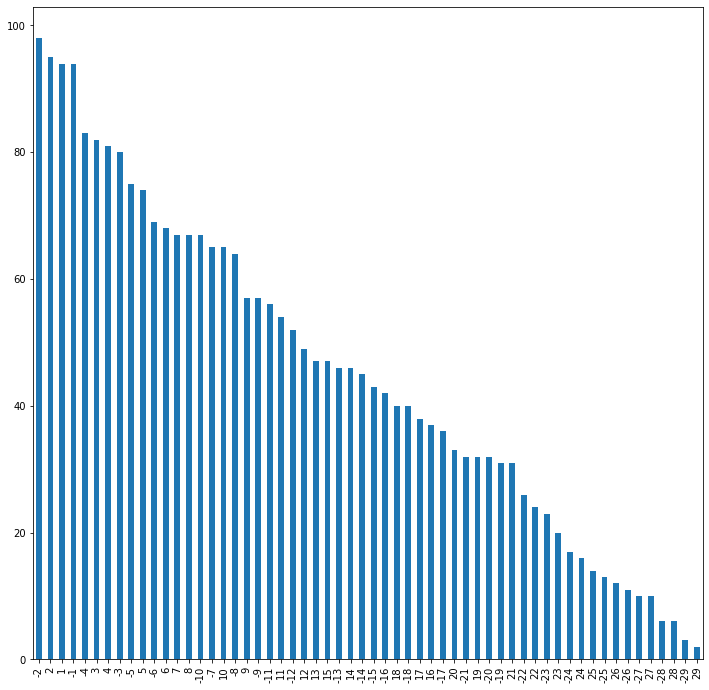

In [1229]:
NBA_Results_2017_2019['HomeRankDifference'].value_counts().plot.bar(figsize=(12,12))

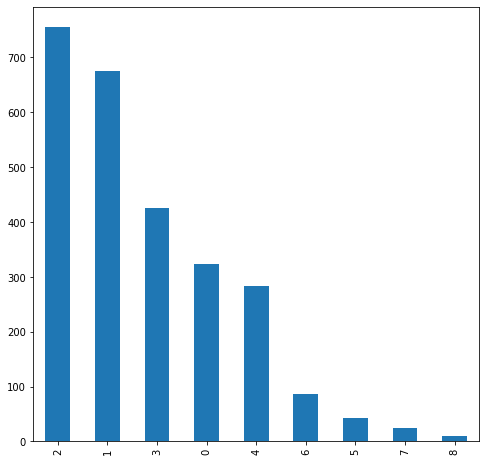

In [1230]:
NBA_Results_2017_2019['TotalWinsAgainstVisitorTeam'].value_counts().plot.bar(figsize=(8,8))

C:\Users\Katie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C132F45A58>,
      dtype=object)

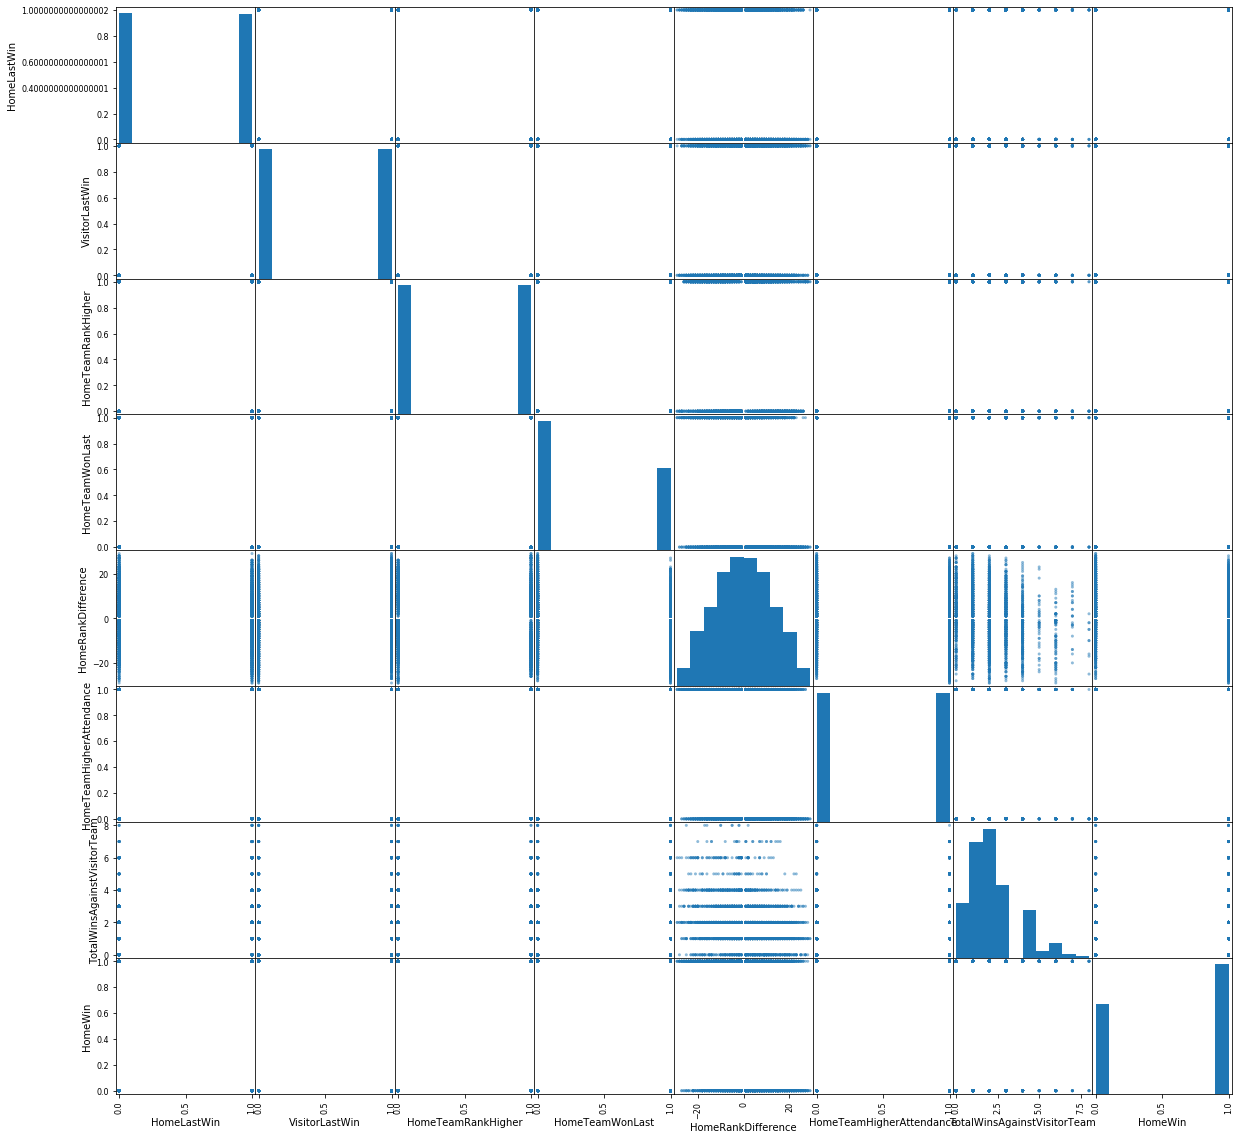

In [1231]:
df = NBA_Results_2017_2019[['HomeLastWin','VisitorLastWin','HomeTeamRankHigher','HomeTeamWonLast', 'HomeRankDifference', 'HomeTeamHigherAttendance', 'TotalWinsAgainstVisitorTeam','HomeWin']]
df['HomeWin'] = df['HomeWin'].astype(int)
pd.plotting.scatter_matrix(df, figsize=(20,20))

In [1232]:
NBA_Results_2017_2019.corr()

,VisitorPts,HomePts,Attendance,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance,TotalWinsAgainstVisitorTeam
VisitorPts,1.000000,0.368886,-0.035677,-0.445876,-0.052092,0.030882,0.009167,-0.009805,0.123256,-0.030009,-0.079190
HomePts,0.368886,1.000000,-0.010376,0.450626,0.062161,-0.035957,-0.027592,0.097735,-0.163946,0.001687,0.076372
Attendance,-0.035677,-0.010376,1.000000,0.017662,0.081034,0.000353,0.038436,0.056190,-0.105555,0.440178,0.172427
HomeWin,-0.445876,0.450626,0.017662,1.000000,0.102648,-0.046608,-0.022461,0.096965,-0.240987,0.038588,0.133099
HomeLastWin,-0.052092,0.062161,0.081034,0.102648,1.000000,-0.039633,-0.000762,0.104257,-0.107265,0.051831,0.279581
VisitorLastWin,0.030882,-0.035957,0.000353,-0.046608,-0.039633,1.000000,0.017530,-0.096786,0.105538,-0.036586,0.013550
HomeTeamRankHigher,0.009167,-0.027592,0.038436,-0.022461,-0.000762,0.017530,1.000000,-0.021112,0.020443,0.087652,-0.040338
HomeTeamWonLast,-0.009805,0.097735,0.056190,0.096965,0.104257,-0.096786,-0.021112,1.000000,-0.245576,0.050219,0.133944
HomeRankDifference,0.123256,-0.163946,-0.105555,-0.240987,-0.107265,0.105538,0.020443,-0.245576,1.000000,-0.161666,-0.201616
HomeTeamHigherAttendance,-0.030009,0.001687,0.440178,0.038588,0.051831,-0.036586,0.087652,0.050219,-0.161666,1.000000,0.045721


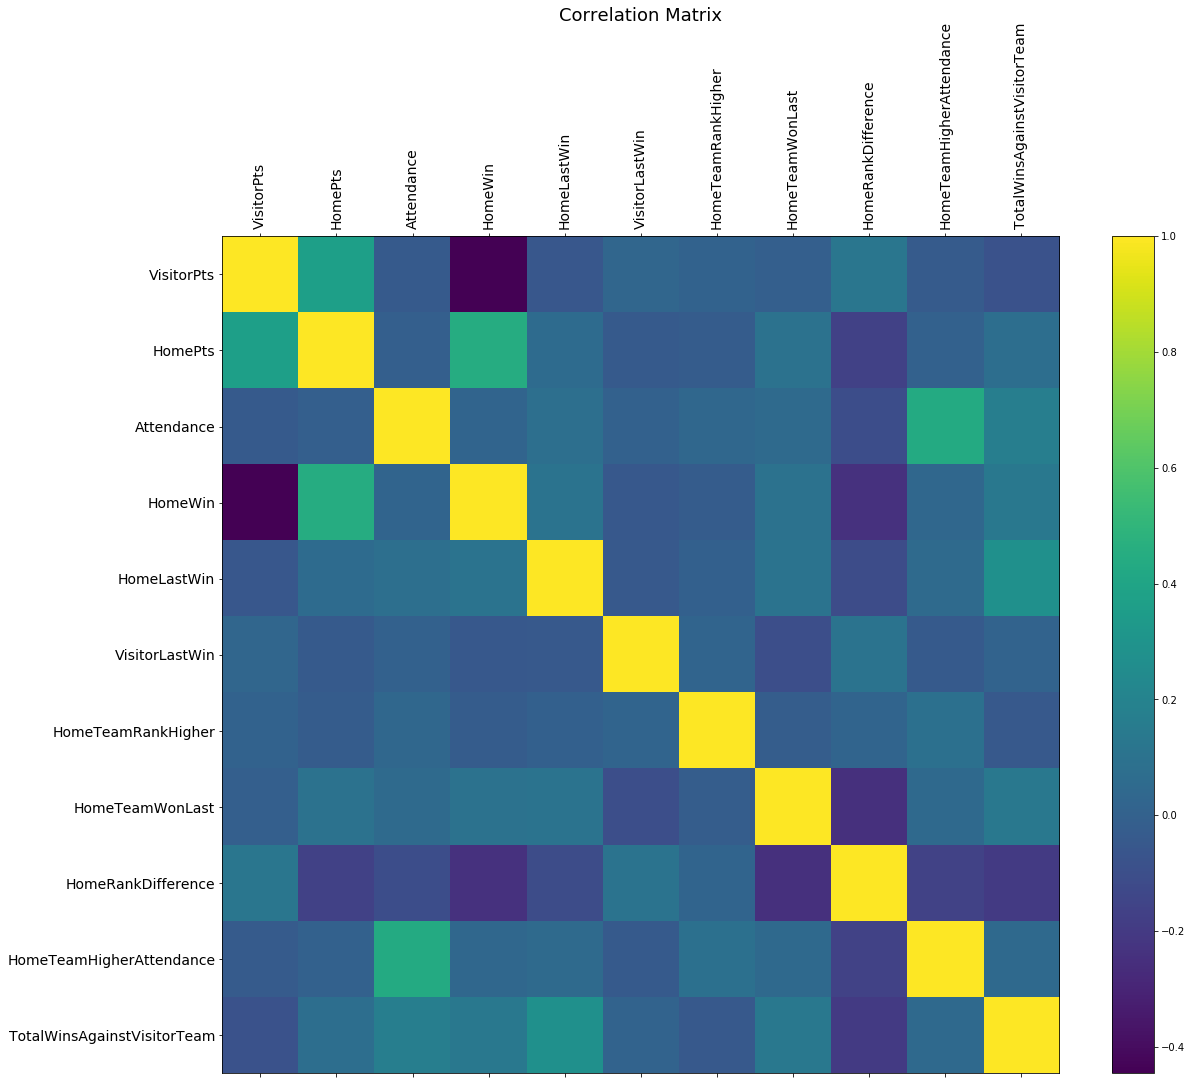

In [1233]:
f = plt.figure(figsize=(19,15))
plt.matshow(NBA_Results_2017_2019.corr(),fignum=f.number)
plt.xticks(range(NBA_Results_2017_2019.corr().shape[1]),NBA_Results_2017_2019.corr().columns,fontsize=14,rotation=90)
plt.yticks(range(NBA_Results_2017_2019.corr().shape[1]), NBA_Results_2017_2019.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', y=1.25, fontsize=18)

plt.show()

**Question 4**<br/>
Create the following ML models and report the training and testing accuracy of each:
  - Decision Tree
  - Random Forest
  - XGBoost
  - Logistic Regression
  - Naive Bayes (Gaussian)

Use 80% of your data for training, and the remainder for testing. Use appropriate pruning and parameter tuning. Insert as many code and text cells as you need.

In [1234]:
X = NBA_Results_2017_2019[['HomeLastWin','VisitorLastWin','HomeTeamRankHigher','HomeTeamWonLast', 'HomeRankDifference', 'HomeTeamHigherAttendance', 'TotalWinsAgainstVisitorTeam' ]]
y = NBA_Results_2017_2019['HomeWin']

In [1235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5)
X_train.head()

,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance,TotalWinsAgainstVisitorTeam
2215,0,0,1,1,8,0,2
300,1,0,1,0,9,1,0
1298,0,1,1,0,1,1,5
1125,0,0,1,0,-8,1,2
1203,0,1,0,0,12,0,2


In [1236]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=3)
class_tree.fit(X_train, y_train)
print('Decision Tree Training Accuracy: ', class_tree.score(X_train,y_train))
print('Decision Tree Testing Accuracy: ', class_tree.score(X_test,y_test))

Decision Tree Training Accuracy:  0.6298237255836112
Decision Tree Testing Accuracy:  0.6247619047619047


In [1237]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=250, max_depth=4, max_leaf_nodes=3)
random_forest.fit(X_train,y_train)
print('Random Forest Training Accuracy: ', random_forest.score(X_train,y_train))
print('Random Forest Testing Accuracy: ', random_forest.score(X_test,y_test))

Random Forest Training Accuracy:  0.6136255359695093
Random Forest Testing Accuracy:  0.6


In [1238]:
# XGBoost
# must install in anaconda : conda install -c anaconda py-xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(max_depth=3, max_leaf_nodes=3)
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_train)
accuracy = accuracy_score(y_train,predictions)
print('XGBoost Train Accuracy: ',accuracy)
predictions = xgb.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print('XGBoost Test Accuracy: ',accuracy)


XGBoost Train Accuracy:  0.6584087660790853
XGBoost Test Accuracy:  0.6076190476190476


In [1239]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print('Logistic Regression Training Accuracy: ', log_reg.score(X_train,y_train))
print('Logistic Regression Testing Accuracy: ', log_reg.score(X_test,y_test))

Logistic Regression Training Accuracy:  0.6383992377322535
Logistic Regression Testing Accuracy:  0.6057142857142858


C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1240]:
# Naive Bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Naive Bayes (Gaussian) Training Accuracy: ', gnb.score(X_train,y_train))
print('Naive Bayes (Gaussian) Testing Accuracy: ', gnb.score(X_test,y_test))

Naive Bayes (Gaussian) Training Accuracy:  0.6341114816579323
Naive Bayes (Gaussian) Testing Accuracy:  0.6057142857142858


**Question 5**<br/>
Analyze the models created from Question 4. Which ones were the best and why? Which ones were the worst? What made sense and what didn't? Insert as many code and text cells as you need. Explain your top two ML models with visualizations and words. 

In [1241]:
print('Average, N=5')

print('\r\nDecision Tree')
print('Training Accuracy : 0.631')
print('Testing Accuracy : 0.613')

print('\r\nRandom Forest')
print('Training Accuracy : 0.608')
print('Testing Accuracy : 0.600')

print('\r\nXGBoost')
print('Training Accuracy : 0.665')
print('Testing Accuracy : 0.617')

print('\r\nLogistic Regression')
print('Training Accuracy : 0.632')
print('Testing Accuracy : 0.626')

print('\r\nNaive Bayes (Gaussian)')
print('Training Accuracy : 0.629')
print('Testing Accuracy : 0.626')

Average, N=5

Decision Tree
Training Accuracy : 0.631
Testing Accuracy : 0.613

Random Forest
Training Accuracy : 0.608
Testing Accuracy : 0.600

XGBoost
Training Accuracy : 0.665
Testing Accuracy : 0.617

Logistic Regression
Training Accuracy : 0.632
Testing Accuracy : 0.626

Naive Bayes (Gaussian)
Training Accuracy : 0.629
Testing Accuracy : 0.626


In [1242]:
print('The best models were Logistic Regression and Naive Bayes. The difference between the training\r\nand testing accuracies were minimal with a difference of 0.004 and 0.007 for Naive Bayes and\r\nLogistic Regression, respectively. These models had the highest accuracy for the average between\r\nthe training and testing sets which were 0.629 for Logistic Regression and 0.627 for Naive Bayes.')

The best models were Logistic Regression and Naive Bayes. The difference between the training
and testing accuracies were minimal with a difference of 0.004 and 0.007 for Naive Bayes and
Logistic Regression, respectively. These models had the highest accuracy for the average between
the training and testing sets which were 0.629 for Logistic Regression and 0.627 for Naive Bayes.


In [1243]:
print('Normalized Logistic Regression and XGBoost were the worst machine learning models. The Normalized\r\nLogistic Regression had the lowest accuracy for the average between the training and testing\r\nsets at 0.572. XGBoost overfit the data between the training and testing sets with a difference\r\nof 0.048.')

Normalized Logistic Regression and XGBoost were the worst machine learning models. The Normalized
Logistic Regression had the lowest accuracy for the average between the training and testing
sets at 0.572. XGBoost overfit the data between the training and testing sets with a difference
of 0.048.


In [1244]:
print('Most the machine learning models made sense to me. The difference between the Logistic Regression\r\nand the Normalized Logistic Regression did not make sense to me. Logistic Regression performed\r\nbetter than the Normalized Logistic Regression, with an average between the training and testing sets\r\nof 0.629 and 0.572, respectively. Why would the Normalized Logistic Regression be so much worst?')

Most the machine learning models made sense to me. The difference between the Logistic Regression
and the Normalized Logistic Regression did not make sense to me. Logistic Regression performed
better than the Normalized Logistic Regression, with an average between the training and testing sets
of 0.629 and 0.572, respectively. Why would the Normalized Logistic Regression be so much worst?


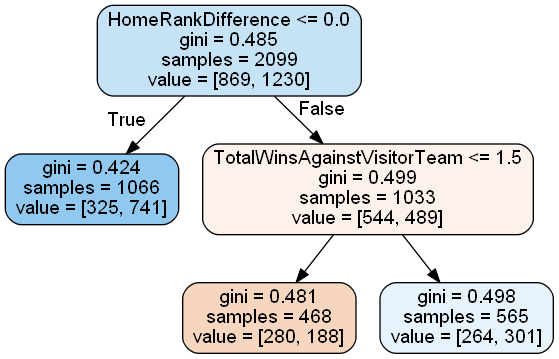

In [1245]:
# Plot decision tree
# must install in anaconda : conda install -c conda-forge pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=class_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

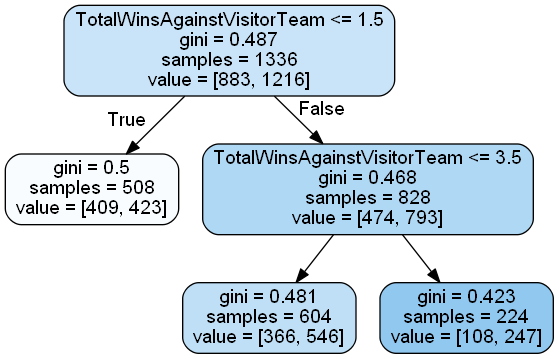

In [1246]:
# Plot a Random Forest tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
single_tree = random_forest.estimators_[200]
export_graphviz(decision_tree=single_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

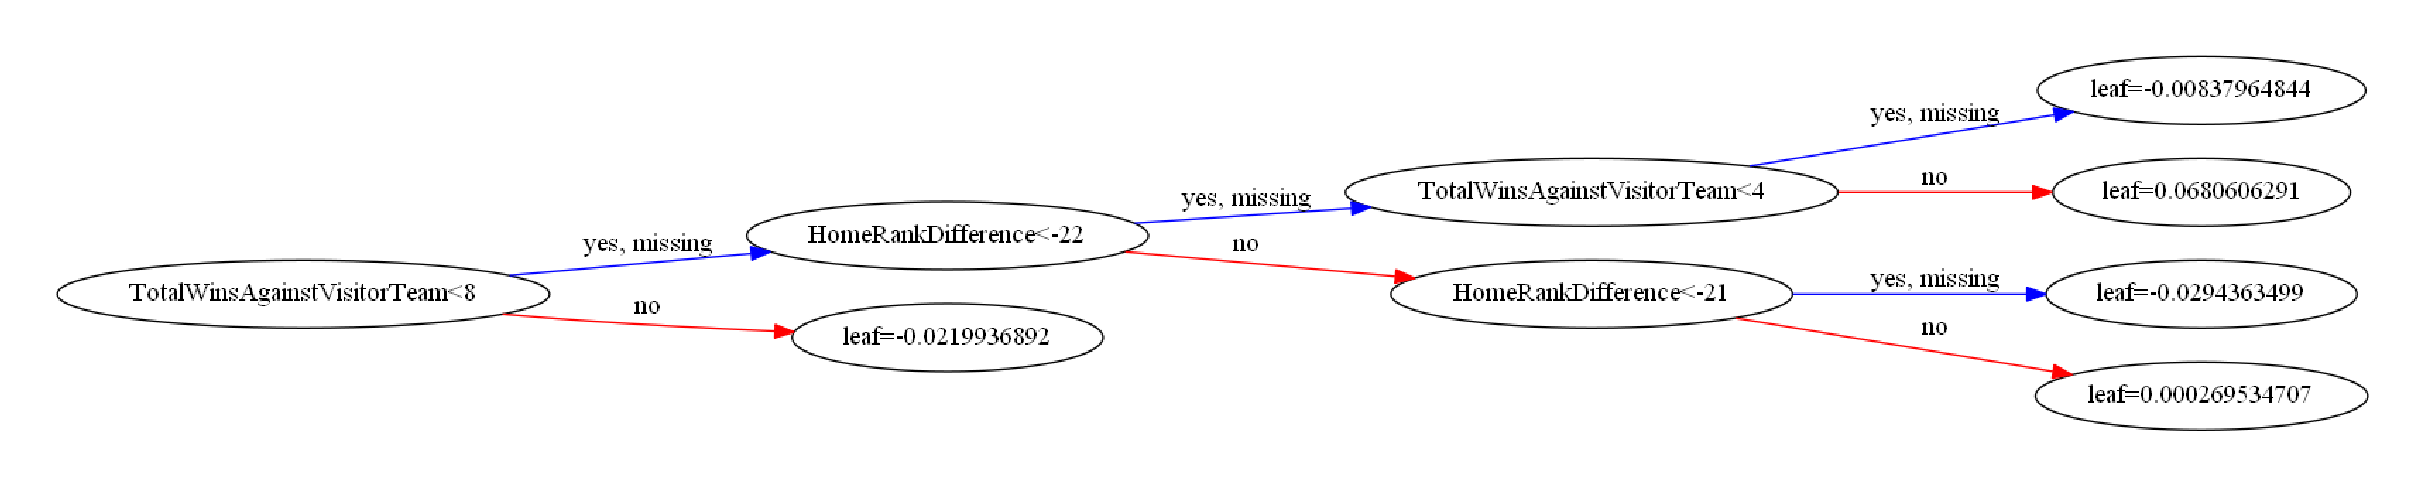

In [1247]:
# Plot XGBoost
# must install in anaconda: conda install graphviz python-graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig,ax = plt.subplots(dpi=500)
plot_tree(xgb,num_trees=99,rankdir='LR',ax=ax)
plt.show()

In [1248]:
NBA_Results_2017_2019['HomeRankDifference'].unique()

array([  1,  -2,  -1, -17,   9, -18, -10,  -9,  11, -22,  13,  20,  -8,
       -15,  22,  -3,  23,   4,  16, -20, -21, -19,   6,  -5, -23,  19,
       -14,   7,  -6,  21,  -4,   2,  24,  25,  15,  10,  17,  -7,  14,
         5, -13,  12, -24, -16, -12,   8, -11, -27,   3, -26, -25,  26,
        18,  29,  27, -28,  28, -29], dtype=int64)

In [1249]:
#single_log_reg = LogisticRegression()
#single_log_reg.fit(X_train['HomeRankDifference'].values.reshape(-1,1),y_train)

In [1250]:
def get_probabilities(home_rank_diff):
    prob_default = 1/(1+np.exp(-log_reg.intercept_[0] - log_reg.coef_[0][0]*home_rank_diff))
    return prob_default

rank_diff = NBA_Results_2017_2019['HomeRankDifference'].unique()
pred_probabilities = get_probabilities(rank_diff)
pd.DataFrame({'Home Rank Difference':rank_diff, 'pred_probabilities':pred_probabilities})

,Home Rank Difference,pred_probabilities
0,1,0.574461
1,-2,0.404516
2,-1,0.460640
3,-17,0.021447
4,9,0.893921
5,-18,0.017134
6,-10,0.098142
7,-9,0.120350
8,11,0.930168
9,-22,0.006929


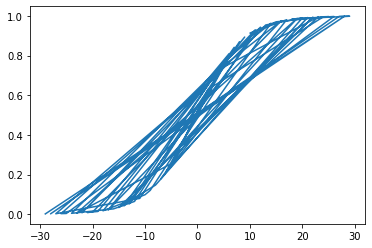

In [1251]:
# Logistic Regression Plot
fix,ax = plt.subplots()
ax.plot(rank_diff,pred_probabilities)

**Question 6**<br/>
Test each ML model from Question 4 on the current partial year, 2019-2020, and report the accuracies for each. Insert as many code and text cells as you need. Was your best model still the best? Analyze and discuss the results.

In [1252]:
NBA_Results_2019_2020['HomeWin'] = NBA_Results_2019_2020['HomePts'] > NBA_Results_2019_2020['VisitorPts']
NBA_Results_2019_2020.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,20787,NaN,True
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,19068,NaN,True
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,15424,NaN,True
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,17923,NaN,False
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,18846,NaN,True


In [1253]:
# Calculate whether the home and/or visitor won their last game
from collections import defaultdict
won_last = defaultdict(int)
NBA_Results_2019_2020['HomeLastWin'] = 0
NBA_Results_2019_2020['VisitorLastWin'] = 0

for index, row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    NBA_Results_2019_2020.loc[index,'HomeLastWin'] = won_last[home_team]
    NBA_Results_2019_2020.loc[index,'VisitorLastWin'] = won_last[visitor_team]

    won_last[home_team] = int(row['HomeWin'])
    won_last[visitor_team] = 1 - int(row['HomeWin'])

NBA_Results_2019_2020.head(20)
#NBA_Results_2019_2020.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,20787,NaN,True,0,0
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,19068,NaN,True,0,0
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,15424,NaN,True,0,0
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,17923,NaN,False,0,0
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,18846,NaN,True,0,0
5,Wed Oct 23 2019,7:30p,Minnesota Timberwolves,127,Brooklyn Nets,126,OT,17732,NaN,False,0,0
6,Wed Oct 23 2019,7:30p,Memphis Grizzlies,101,Miami Heat,120,NaN,19600,NaN,True,0,0
7,Wed Oct 23 2019,7:30p,Boston Celtics,93,Philadelphia 76ers,107,NaN,20422,NaN,True,0,0
8,Wed Oct 23 2019,8:30p,Washington Wizards,100,Dallas Mavericks,108,NaN,19816,NaN,True,0,0
9,Wed Oct 23 2019,8:30p,New York Knicks,111,San Antonio Spurs,120,NaN,18354,NaN,True,0,0


In [1254]:
# Calculate whether the home team was ranked higher in 2017 - 2018 season
NBA_Results_2019_2020['HomeTeamRankHigher'] = 0
for index,row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_rank = NBA_Standings_2018_2019[NBA_Standings_2018_2019['Team']==home_team]['Rank'].values
    visitor_rank = NBA_Standings_2018_2019[NBA_Standings_2018_2019['Team']==visitor_team]['Rank'].values
    NBA_Results_2019_2020.loc[index,'HomeTeamRankHigher'] = int(home_rank > visitor_rank)

NBA_Results_2019_2020.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher
240,Mon Nov 25 2019,7:00p,Orlando Magic,88,Detroit Pistons,103,NaN,14695,NaN,True,0,0,1
241,Mon Nov 25 2019,7:00p,Memphis Grizzlies,114,Indiana Pacers,126,NaN,15141,NaN,True,1,0,0
242,Mon Nov 25 2019,7:30p,Minnesota Timberwolves,125,Atlanta Hawks,113,NaN,16218,NaN,False,0,0,1
243,Mon Nov 25 2019,7:30p,Sacramento Kings,102,Boston Celtics,103,NaN,19156,NaN,True,0,1,1
244,Mon Nov 25 2019,7:30p,Charlotte Hornets,100,Miami Heat,117,NaN,19600,NaN,True,0,0,1
245,Mon Nov 25 2019,7:30p,Philadelphia 76ers,96,Toronto Raptors,101,NaN,19800,NaN,True,1,1,0
246,Mon Nov 25 2019,8:00p,Portland Trail Blazers,117,Chicago Bulls,94,NaN,18776,NaN,False,1,0,0
247,Mon Nov 25 2019,8:00p,Utah Jazz,118,Milwaukee Bucks,122,NaN,17385,NaN,True,1,1,0
248,Mon Nov 25 2019,8:30p,Los Angeles Lakers,114,San Antonio Spurs,104,NaN,18498,NaN,False,1,1,0
249,Mon Nov 25 2019,10:30p,Oklahoma City Thunder,100,Golden State Warriors,97,NaN,18064,NaN,False,0,0,1


In [1255]:
# Calculate if the home team won the last time these two teams met
last_match_winner = defaultdict(int)
NBA_Results_2019_2020['HomeTeamWonLast'] = 0
for index,row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    teams = tuple(sorted([home_team,visitor_team]))
    if last_match_winner[teams] == home_team:
        home_team_won_last = 1
    else:
        home_team_won_last = 0
    NBA_Results_2019_2020.loc[index,'HomeTeamWonLast'] = home_team_won_last
    # Now record who won this one
    if row['HomeWin']:
        winner = home_team
    else:
        winner = visitor_team
    last_match_winner[teams] = winner
    
NBA_Results_2019_2020
#NBA_Results_2019_2020['HomeTeamWonLast'].value_counts()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,20787,NaN,True,0,0,0,0
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,19068,NaN,True,0,0,0,0
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,15424,NaN,True,0,0,0,0
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,17923,NaN,False,0,0,0,0
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,18846,NaN,True,0,0,0,0
5,Wed Oct 23 2019,7:30p,Minnesota Timberwolves,127,Brooklyn Nets,126,OT,17732,NaN,False,0,0,0,0
6,Wed Oct 23 2019,7:30p,Memphis Grizzlies,101,Miami Heat,120,NaN,19600,NaN,True,0,0,0,0
7,Wed Oct 23 2019,7:30p,Boston Celtics,93,Philadelphia 76ers,107,NaN,20422,NaN,True,0,0,0,0
8,Wed Oct 23 2019,8:30p,Washington Wizards,100,Dallas Mavericks,108,NaN,19816,NaN,True,0,0,0,0
9,Wed Oct 23 2019,8:30p,New York Knicks,111,San Antonio Spurs,120,NaN,18354,NaN,True,0,0,0,0


In [1256]:
# Calculate if the home team ranked higher in the 2017 - 2019 season
NBA_Results_2019_2020['HomeRankDifference'] = 0
for index,row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_rank = NBA_Standings_2018_2019[NBA_Standings_2018_2019['Team']==home_team]['Rank'].values
    visitor_rank = NBA_Standings_2018_2019[NBA_Standings_2018_2019['Team']==visitor_team]['Rank'].values
    NBA_Results_2019_2020.loc[index,'HomeRankDifference'] = int(home_rank) - int(visitor_rank)
    
NBA_Results_2019_2020.head(15)
#NBA_Results_2019_2020.tail(15)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference
0,Tue Oct 22 2019,8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,20787,NaN,True,0,0,0,0,-22
1,Tue Oct 22 2019,10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,19068,NaN,True,0,0,0,0,-8
2,Wed Oct 23 2019,7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,15424,NaN,True,0,0,0,0,-10
3,Wed Oct 23 2019,7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,17923,NaN,False,0,0,0,0,-5
4,Wed Oct 23 2019,7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,18846,NaN,True,0,0,0,0,-13
5,Wed Oct 23 2019,7:30p,Minnesota Timberwolves,127,Brooklyn Nets,126,OT,17732,NaN,False,0,0,0,0,-7
6,Wed Oct 23 2019,7:30p,Memphis Grizzlies,101,Miami Heat,120,NaN,19600,NaN,True,0,0,0,0,-5
7,Wed Oct 23 2019,7:30p,Boston Celtics,93,Philadelphia 76ers,107,NaN,20422,NaN,True,0,0,0,0,-2
8,Wed Oct 23 2019,8:30p,Washington Wizards,100,Dallas Mavericks,108,NaN,19816,NaN,True,0,0,0,0,-3
9,Wed Oct 23 2019,8:30p,New York Knicks,111,San Antonio Spurs,120,NaN,18354,NaN,True,0,0,0,0,-17


In [1257]:
# Calculate whether the home team had higher attendance than when these two teams played at the visitor's stadium
# New feature
last_match_attandance = defaultdict(int)
NBA_Results_2019_2020['HomeTeamHigherAttendance'] = 0
for index,row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_team_attendance = NBA_Results_2019_2020[NBA_Results_2019_2020['Home Team']==home_team]
    home_team_attendance = home_team_attendance[home_team_attendance['Visitor Team']==visitor_team]['Attendance']
    visitor_team_attendance = NBA_Results_2019_2020[NBA_Results_2019_2020['Home Team']==visitor_team]
    visitor_team_attendance = visitor_team_attendance[visitor_team_attendance['Visitor Team']==home_team]['Attendance']
    if visitor_team_attendance.mean() < home_team_attendance.mean():
        home_tm_attendance = 1
    elif visitor_team_attendance.mean() > home_team_attendance.mean():
        home_tm_attendance = 0
    NBA_Results_2019_2020.loc[index,'HomeTeamHigherAttendance'] = home_tm_attendance
    
    
NBA_Results_2019_2020.tail(10)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance
240,Mon Nov 25 2019,7:00p,Orlando Magic,88,Detroit Pistons,103,NaN,14695,NaN,True,0,0,1,0,1,1
241,Mon Nov 25 2019,7:00p,Memphis Grizzlies,114,Indiana Pacers,126,NaN,15141,NaN,True,1,0,0,0,-12,1
242,Mon Nov 25 2019,7:30p,Minnesota Timberwolves,125,Atlanta Hawks,113,NaN,16218,NaN,False,0,0,1,0,5,1
243,Mon Nov 25 2019,7:30p,Sacramento Kings,102,Boston Celtics,103,NaN,19156,NaN,True,0,1,1,0,-10,1
244,Mon Nov 25 2019,7:30p,Charlotte Hornets,100,Miami Heat,117,NaN,19600,NaN,True,0,0,1,0,1,1
245,Mon Nov 25 2019,7:30p,Philadelphia 76ers,96,Toronto Raptors,101,NaN,19800,NaN,True,1,1,0,0,-5,1
246,Mon Nov 25 2019,8:00p,Portland Trail Blazers,117,Chicago Bulls,94,NaN,18776,NaN,False,1,0,0,0,21,1
247,Mon Nov 25 2019,8:00p,Utah Jazz,118,Milwaukee Bucks,122,NaN,17385,NaN,True,1,1,0,0,-7,0
248,Mon Nov 25 2019,8:30p,Los Angeles Lakers,114,San Antonio Spurs,104,NaN,18498,NaN,False,1,1,0,0,-7,0
249,Mon Nov 25 2019,10:30p,Oklahoma City Thunder,100,Golden State Warriors,97,NaN,18064,NaN,False,0,0,1,0,-7,0


In [1258]:
# Total home team wins against visitor team
total_home_team_wins = defaultdict(int)
NBA_Results_2019_2020['TotalWinsAgainstVisitorTeam'] = 0

for index, row in NBA_Results_2019_2020.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    NBA_Results_2019_2020.loc[index,'TotalWinsAgainstVisitorTeam'] = total_home_team_wins[home_team]

    home_team_wins = NBA_Results_2019_2020[NBA_Results_2019_2020['Home Team']==home_team]
    home_team_wins = home_team_wins[home_team_wins['Visitor Team']==visitor_team]['HomeWin']

    total_home_team_wins[home_team] = int(sum(home_team_wins))

#NBA_Results_2019_2020.head(20)
#NBA_Results_2019_2020.iloc[1000:1020]
NBA_Results_2019_2020.tail(20)

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT,Attendance,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeTeamRankHigher,HomeTeamWonLast,HomeRankDifference,HomeTeamHigherAttendance,TotalWinsAgainstVisitorTeam
230,Sat Nov 23 2019,8:00p,Portland Trail Blazers,104,Cleveland Cavaliers,110,NaN,19432,NaN,True,0,0,0,0,22,1,0
231,Sat Nov 23 2019,8:00p,Los Angeles Lakers,109,Memphis Grizzlies,108,NaN,17794,NaN,False,0,1,1,0,3,0,0
232,Sat Nov 23 2019,8:30p,Detroit Pistons,90,Milwaukee Bucks,104,NaN,17585,NaN,True,1,1,0,0,-15,0,1
233,Sat Nov 23 2019,9:00p,New Orleans Pelicans,120,Utah Jazz,128,NaN,18306,NaN,True,1,1,1,0,-16,0,1
234,Sun Nov 24 2019,3:30p,Dallas Mavericks,137,Houston Rockets,123,NaN,18055,NaN,False,0,1,1,0,-17,0,1
235,Sun Nov 24 2019,6:00p,Brooklyn Nets,103,New York Knicks,101,NaN,18770,NaN,False,0,1,1,0,16,1,0
236,Sun Nov 24 2019,6:00p,Sacramento Kings,113,Washington Wizards,106,NaN,15885,NaN,False,1,0,1,0,6,1,1
237,Sun Nov 24 2019,8:00p,Phoenix Suns,104,Denver Nuggets,116,NaN,19520,NaN,True,1,1,1,1,-25,1,1
238,Sun Nov 24 2019,9:00p,New Orleans Pelicans,109,Los Angeles Clippers,134,NaN,19068,NaN,True,1,0,0,0,-12,1,1
239,Mon Nov 25 2019,7:00p,Brooklyn Nets,108,Cleveland Cavaliers,106,NaN,17143,NaN,False,1,1,1,0,14,1,1


In [1259]:
X_test_2019_2020 = NBA_Results_2019_2020[['HomeLastWin','VisitorLastWin','HomeTeamRankHigher','HomeTeamWonLast', 'HomeRankDifference', 'HomeTeamHigherAttendance', 'TotalWinsAgainstVisitorTeam' ]]
y_test_2019_2020 = NBA_Results_2019_2020['HomeWin']

In [1260]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
class_tree_2019_2020 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=3)
class_tree_2019_2020.fit(X_train, y_train)
print('Decision Tree Training Accuracy: ', class_tree_2019_2020.score(X_train,y_train))
print('Decision Tree Testing Accuracy: ', class_tree_2019_2020.score(X_test_2019_2020,y_test_2019_2020))

Decision Tree Training Accuracy:  0.6298237255836112
Decision Tree Testing Accuracy:  0.568


In [1261]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_2019_2020 = RandomForestClassifier(n_estimators=250, max_depth=4, max_leaf_nodes=3)
random_forest_2019_2020.fit(X_train,y_train)
print('Random Forest Training Accuracy: ', random_forest_2019_2020.score(X_train,y_train))
print('Random Forest Testing Accuracy: ', random_forest_2019_2020.score(X_test_2019_2020,y_test_2019_2020))

Random Forest Training Accuracy:  0.6131491186279181
Random Forest Testing Accuracy:  0.612


In [1262]:
# XGBoost
# must install in anaconda : conda install -c anaconda py-xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_2019_2020 = XGBClassifier(max_depth=3, max_leaf_nodes=3)
xgb_2019_2020.fit(X_train,y_train)
predictions = xgb_2019_2020.predict(X_train)
accuracy = accuracy_score(y_train,predictions)
print('XGBoost Train Accuracy: ',accuracy)
predictions = xgb_2019_2020.predict(X_test_2019_2020)
accuracy = accuracy_score(y_test_2019_2020,predictions)
print('XGBoost Test Accuracy: ',accuracy)

XGBoost Train Accuracy:  0.6584087660790853
XGBoost Test Accuracy:  0.616


In [1263]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_2019_2020 = LogisticRegression()
log_reg_2019_2020.fit(X_train,y_train)
print('Logistic Regression Training Accuracy: ', log_reg_2019_2020.score(X_train,y_train))
print('Logistic Regression Testing Accuracy: ', log_reg_2019_2020.score(X_test_2019_2020,y_test_2019_2020))

Logistic Regression Training Accuracy:  0.6383992377322535
Logistic Regression Testing Accuracy:  0.632


C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1264]:
# Naive Bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB
gnb_2019_2020 = GaussianNB()
gnb_2019_2020.fit(X_train,y_train)
print('Naive Bayes (Gaussian) Training Accuracy: ', gnb_2019_2020.score(X_train,y_train))
print('Naive Bayes (Gaussian) Testing Accuracy: ', gnb_2019_2020.score(X_test_2019_2020,y_test_2019_2020))

Naive Bayes (Gaussian) Training Accuracy:  0.6341114816579323
Naive Bayes (Gaussian) Testing Accuracy:  0.612


In [1265]:
print('Averages for 2019-2020 Results as Testing Set, N=5')

print('\r\nDecision Tree')
print('Training Accuracy : 0.624')
print('Testing Accuracy : 0.578')

print('\r\nRandom Forest')
print('Training Accuracy : 0.609')
print('Testing Accuracy : 0.618')

print('\r\nXGBoost')
print('Training Accuracy : 0.660')
print('Testing Accuracy : 0.606')

print('\r\nLogistic Regression')
print('Training Accuracy : 0.632')
print('Testing Accuracy : 0.632')

print('\r\nNaive Bayes (Gaussian)')
print('Training Accuracy : 0.627')
print('Testing Accuracy : 0.610')

Averages for 2019-2020 Results as Testing Set, N=5

Decision Tree
Training Accuracy : 0.624
Testing Accuracy : 0.578

Random Forest
Training Accuracy : 0.609
Testing Accuracy : 0.618

XGBoost
Training Accuracy : 0.660
Testing Accuracy : 0.606

Logistic Regression
Training Accuracy : 0.632
Testing Accuracy : 0.632

Naive Bayes (Gaussian)
Training Accuracy : 0.627
Testing Accuracy : 0.610


In [1266]:
print('The best models were Logistic Regression, Naive Bayes, and Random Forest. The difference between the\r\ntraining and testing accuracies were minimal with a difference of 0.000 and 0.008 for Logistic Regression\r\nand Random Forest, respectively. Naive Bayes had the worst difference between the training and testing\r\nsets of the best models at 0.018. These models had the highest accuracy for the average between the training\r\nand testing sets which were 0.632 for Logistic Regression, 0.618 for Naive Bayes, and 0.613 for Random Forest.')

The best models were Logistic Regression, Naive Bayes, and Random Forest. The difference between the
training and testing accuracies were minimal with a difference of 0.000 and 0.008 for Logistic Regression
and Random Forest, respectively. Naive Bayes had the worst difference between the training and testing
sets of the best models at 0.018. These models had the highest accuracy for the average between the training
and testing sets which were 0.632 for Logistic Regression, 0.618 for Naive Bayes, and 0.613 for Random Forest.


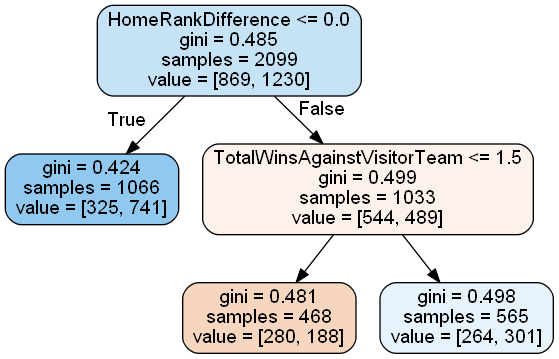

In [1267]:
# Plot decision tree
# must install in anaconda : conda install -c conda-forge pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=class_tree_2019_2020,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

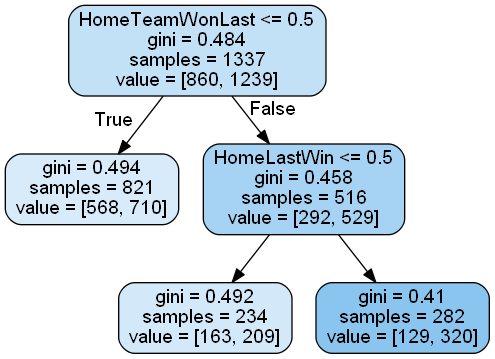

In [1268]:
# Plot a Random Forest tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
single_tree = random_forest_2019_2020.estimators_[200]
export_graphviz(decision_tree=single_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

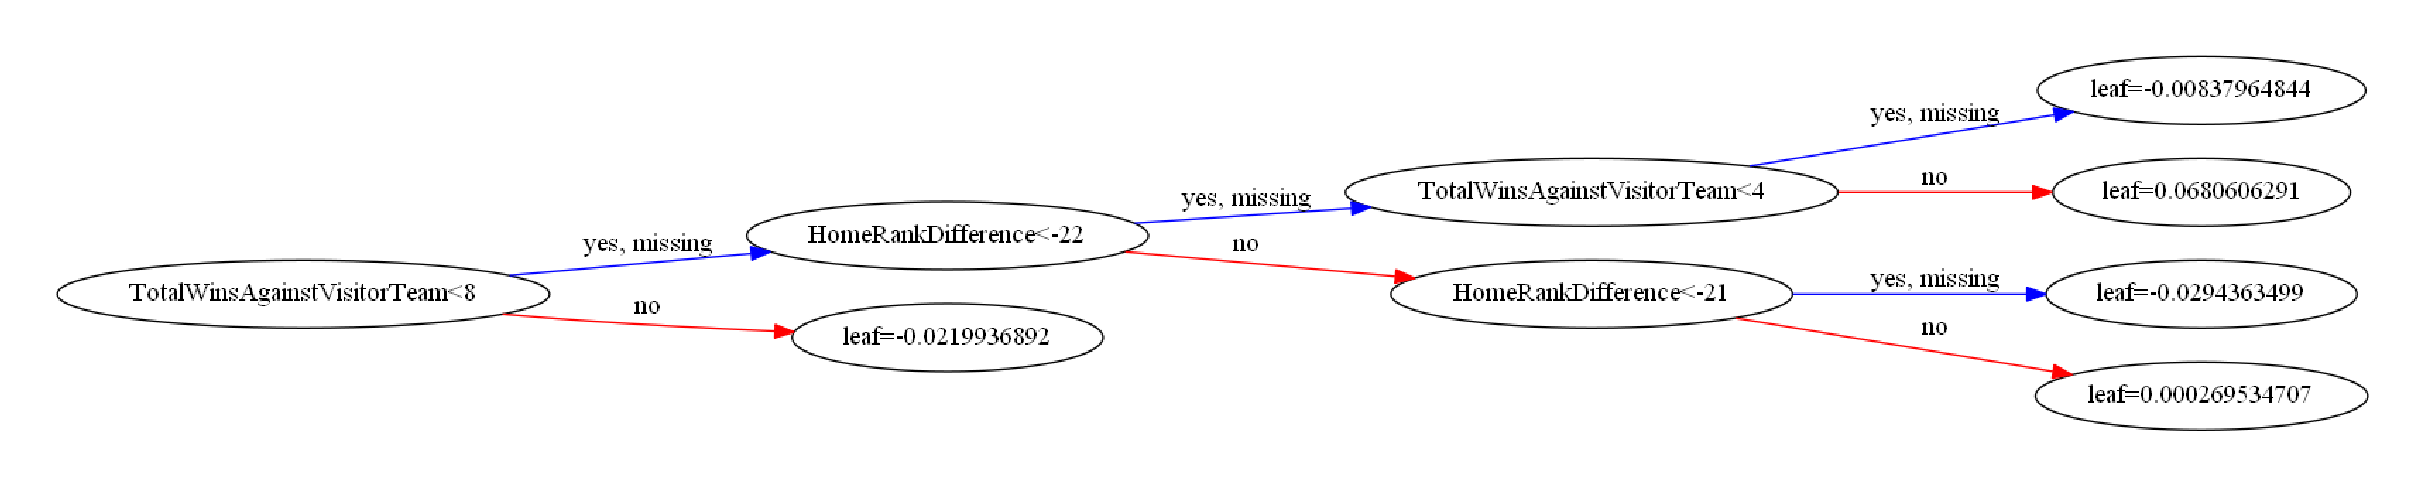

In [1269]:
# Plot XGBoost
# must install in anaconda: conda install graphviz python-graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig,ax = plt.subplots(dpi=500)
plot_tree(xgb_2019_2020,num_trees=99,rankdir='LR',ax=ax)
plt.show()

In [1270]:
rank_diff_2019_2020 = NBA_Results_2019_2020['HomeRankDifference'].unique()
pred_probabilities_2019_2020 = get_probabilities(rank_diff_2019_2020)
pd.DataFrame({'Home Rank Difference':rank_diff_2019_2020, 'pred_probabilities':pred_probabilities_2019_2020})

,Home Rank Difference,pred_probabilities
0,-22,0.006929
1,-8,0.146765
2,-10,0.098142
3,-5,0.254749
4,-13,0.051917
5,-7,0.177806
6,-2,0.404516
7,-3,0.350782
8,-17,0.021447
9,10,0.913753


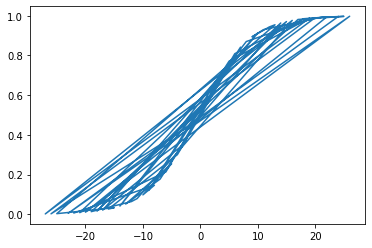

In [1271]:
# Logistic Regression Plot
fix,ax = plt.subplots()
ax.plot(rank_diff_2019_2020,pred_probabilities_2019_2020)

**Question 7**<br/>
Do at least two things that you think will improve your model's prediction capabilities for 2019-2020 (ie incorporate more data, engineer another feature, use a new ML model, normalize your data, etc). Insert as many code and text cells as you need.

Re-evaluate: did it improve your model? Give relevant results and visualizations.

In [1272]:
# Scale data for k-Nearest Neighbors
from sklearn.preprocessing import StandardScaler
z_X = StandardScaler().fit_transform(X)
z_X

z_fit = StandardScaler().fit(X_train)
z_X_train = z_fit.transform(X_train)
z_X_test = z_fit.transform(X_test_2019_2020)
z_X_test

array([[-1.0033405 , -1.00717198, -0.99477307, ..., -1.770508  ,
         0.98346212, -1.37877383],
       [-1.0033405 , -1.00717198, -0.99477307, ..., -0.63556301,
         0.98346212, -1.37877383],
       [-1.0033405 , -1.00717198, -0.99477307, ..., -0.79769801,
         0.98346212, -1.37877383],
       ...,
       [ 0.99667062,  0.99287909, -0.99477307, ..., -0.55449552,
        -1.01681598, -0.72652089],
       [ 0.99667062,  0.99287909, -0.99477307, ..., -0.55449552,
        -1.01681598, -0.72652089],
       [-1.0033405 , -1.00717198,  1.00525439, ..., -0.55449552,
        -1.01681598, -1.37877383]])

In [1273]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=100) 
kNN.fit(z_X_train,y_train)
print('Training accuracy: ', kNN.score(z_X_train,y_train))
print('Testing accuracy: ', kNN.score(z_X_test,y_test_2019_2020))

Training accuracy:  0.6331586469747499
Testing accuracy:  0.612


In [1274]:
# Normalized Logistic Regression
scaled_log_reg = LogisticRegression()
scaled_log_reg.fit(X_train, y_train)

scaler_2019_2020 = StandardScaler()
X_train_scaled = scaler_2019_2020.fit_transform(X_train)

X_test_scaled_2019_2020 = scaler_2019_2020.transform(X_test_2019_2020)

print('Normalized Logistic Regression Training Accuracy: ', scaled_log_reg.score(X_train_scaled,y_train))
print('Normalized Logistic Regression Testing Accuracy: ', scaled_log_reg.score(X_test_scaled_2019_2020,y_test_2019_2020))

Normalized Logistic Regression Training Accuracy:  0.5759885659838018
Normalized Logistic Regression Testing Accuracy:  0.536


C:\Users\Katie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1275]:
print('Averages for 2019-2020 Results as Testing Set, N=5')

print('\r\nk-Nearest Neighbors')
print('Training Accuracy : 0.633')
print('Testing Accuracy : 0.613')

print('\r\nNormalized Logistic Regression')
print('Training Accuracy : 0.577')
print('Testing Accuracy : 0.535')

Averages for 2019-2020 Results as Testing Set, N=5

k-Nearest Neighbors
Training Accuracy : 0.633
Testing Accuracy : 0.613

Normalized Logistic Regression
Training Accuracy : 0.577
Testing Accuracy : 0.535


In [1276]:
print('k-Nearest Neighbors is one of the best machine learning models. k-Nearest Neighbors had a high accuracy\r\nfor the average between the training and testing sets which was 0.623. Naive Bayes had the worst difference\r\nbetween the training and testing sets of the best models at 0.020.')

k-Nearest Neighbors is one of the best machine learning models. k-Nearest Neighbors had a high accuracy
for the average between the training and testing sets which was 0.623. Naive Bayes had the worst difference
between the training and testing sets of the best models at 0.020.


In [1277]:
print('Normalized Logistic Regression was the worst machine learning model. The Normalized\r\nLogistic Regression had the lowest accuracy for the average between the training and\r\ntesting sets at 0.572.')

Normalized Logistic Regression was the worst machine learning model. The Normalized
Logistic Regression had the lowest accuracy for the average between the training and
testing sets at 0.572.


In [1278]:
print('The difference between the Logistic Regression and the Normalized Logistic Regression did not\r\nmake sense to me. Logistic Regression performed better than the Normalized Logistic Regression,\r\nwith an average between the training and testing sets of 0.629 and 0.572, respectively. Why would\r\nthe Normalized Logistic Regression be so much worst?')

The difference between the Logistic Regression and the Normalized Logistic Regression did not
make sense to me. Logistic Regression performed better than the Normalized Logistic Regression,
with an average between the training and testing sets of 0.629 and 0.572, respectively. Why would
the Normalized Logistic Regression be so much worst?
